**Лабораторная работа №6** Вариант 18

**Цель лабораторной работы:** научиться решать задачу классификации методами решающих деревьев и ансамблей на их основе.

Выполним анализ набора данных «Рак молочной железы» (`cancer.csv`). Этот набор данных содержит информацию о диагностике рака молочной железы и включает следующие атрибуты:

*   **age** – возрастная группа пациента
*   **menopause** – менопаузальный статус
*   **tumor-size** – размер опухоли в мм
*   **inv-nodes** – количество инвазивных лимфатических узлов
*   **node-caps** – наличие капсулы лимфатического узла (да/нет)
*   **deg-malig** – степень злокачественности опухоли (1, 2, 3)
*   **breast** – сторона груди (левая/правая)
*   **breast-quad** – квадрант груди, в котором находится опухоль
*   **irradiat** – прошла ли пациентка лучевую терапию (да/нет)
*   **Class** – класс рецидива (рецидив/отсутствие рецидива)

**1. Импорт необходимых библиотек**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)

**2. Загрузка и первичный анализ данных**

In [ ]:
data = pd.read_csv('/content/cancer.csv')

print("Размерность данных:", data.shape)
print("\nПервые 5 строк данных:")
print(data.head())

print("\nИнформация о данных:")
print(data.info())

print("\nСтатистика данных:")
print(data.describe())

Размерность данных: (286, 10)

Первые 5 строк данных:
     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  30-39   premeno      30-34       0-2        no          3   left   
1  40-49   premeno      20-24       0-2        no          2  right   
2  40-49   premeno      20-24       0-2        no          2   left   
3  60-69      ge40      15-19       0-2        no          2  right   
4  40-49   premeno        0-4       0-2        no          2  right   

  breast-quad irradiat                 Class  
0    left_low       no  no-recurrence-events  
1    right_up       no  no-recurrence-events  
2    left_low       no  no-recurrence-events  
3     left_up       no  no-recurrence-events  
4   right_low       no  no-recurrence-events  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-nu

**3. Кодирование категориальных признаков в числовые**

In [ ]:
label_encoder = LabelEncoder()

# Определяем категориальные столбцы (тип 'object'), исключая целевую переменную 'Class'
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
if 'Class' in categorical_cols:
    categorical_cols.remove('Class')

# Применяем LabelEncoder к каждому категориальному столбцу
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

print("Данные после кодирования категориальных признаков:")
print(data.head())

Данные после кодирования категориальных признаков:
   age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0    1          2           5          0          1          3       0   
1    2          2           3          0          1          2       1   
2    2          2           3          0          1          2       0   
3    4          0           2          0          1          2       1   
4    2          2           0          0          1          2       1   

   breast-quad  irradiat                 Class  
0            2         0  no-recurrence-events  
1            5         0  no-recurrence-events  
2            2         0  no-recurrence-events  
3            3         0  no-recurrence-events  
4            4         0  no-recurrence-events  


**4. Разделение данных на признаки и целевую переменную**

In [ ]:
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(data['Class'])
class_names = label_encoder_y.classes_

X = data.drop(['Class'], axis=1)

print("Размерность признаков:", X.shape)
print("Названия признаков:", X.columns.tolist())
print("Размерность целевой переменной:", y.shape)
print("Уникальные классы целевой переменной (закодированные):", np.unique(y))
print("Исходные названия классов:", class_names)
print("\nПервые 5 строк признаков:")
print(X.head())

Размерность признаков: (286, 9)
Названия признаков: ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
Размерность целевой переменной: (286,)
Уникальные классы целевой переменной (закодированные): [0 1]
Исходные названия классов: ['no-recurrence-events' 'recurrence-events']

Первые 5 строк признаков:
   age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0    1          2           5          0          1          3       0   
1    2          2           3          0          1          2       1   
2    2          2           3          0          1          2       0   
3    4          0           2          0          1          2       1   
4    2          2           0          0          1          2       1   

   breast-quad  irradiat  
0            2         0  
1            5         0  
2            2         0  
3            3         0  
4            4         0  


**5. Разделение данных на обучающую и тестовую выборки**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nОбучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")


Обучающая выборка: 200 samples
Тестовая выборка: 86 samples


**6. Создание и обучение модели Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


Модель Random Forest обучена!


**7. Прогнозирование и оценка модели**

In [ ]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочность модели на тестовой выборке: {accuracy:.4f}")

print("\n" + "="*50)
print("Отчет по классификации:")
print("="*50)
print(classification_report(y_test, y_pred))


Точность модели на тестовой выборке: 0.6744

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        59
           1       0.46      0.22      0.30        27

    accuracy                           0.67        86
   macro avg       0.59      0.55      0.54        86
weighted avg       0.63      0.67      0.63        86



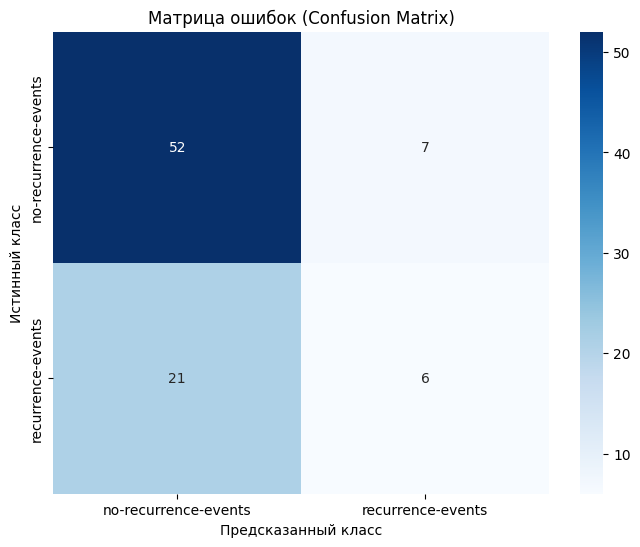

In [ ]:
# Строим матрицу ошибок
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

**8. Анализ важности признаков**

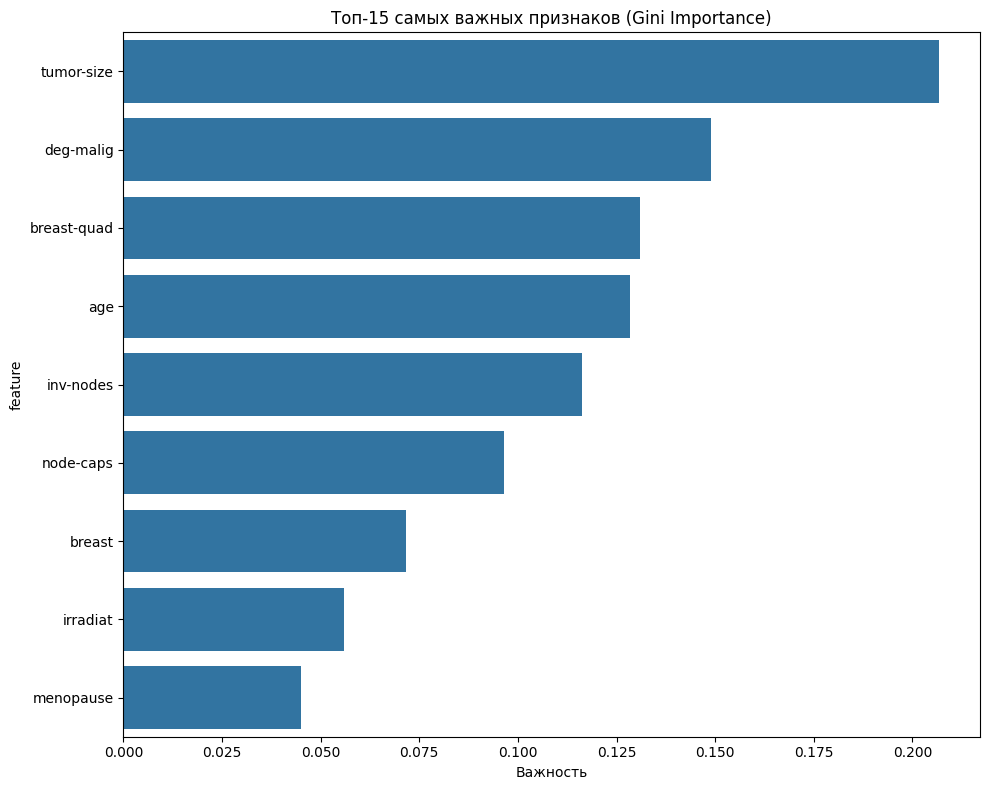

In [ ]:
# Важность признаков на основе среднего уменьшения неоднородности (Gini Importance)
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
features_df = features_df.sort_values('importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=features_df.head(15))
plt.title('Топ-15 самых важных признаков (Gini Importance)')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

In [ ]:
# Выводим таблицу с важностью признаков
print("\nТоп-10 самых важных признаков:")
print(features_df.head(10))


Топ-10 самых важных признаков:
       feature  importance
2   tumor-size    0.206791
5    deg-malig    0.148856
7  breast-quad    0.131043
0          age    0.128467
3    inv-nodes    0.116133
4    node-caps    0.096363
6       breast    0.071618
8     irradiat    0.055792
1    menopause    0.044938


**9. Подбор гиперпараметров**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров для перебора
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создаем модель для поиска
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Запускаем поиск
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Выводим лучшие параметры
print("\nЛучшие параметры:", grid_search.best_params_)
print("Лучшая точность при кросс-валидации: {:.4f}".format(grid_search.best_score_))


Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Лучшая точность при кросс-валидации: 0.7500


In [ ]:
# Оцениваем лучшую модель на тестовых данных
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Точность улучшенной модели на тестовой выборке: {best_accuracy:.4f}")

Точность улучшенной модели на тестовой выборке: 0.7209


Вывод

В данной лабораторной работе мы успешно решили задачу классификации рака молочной железы с использованием методов решающих деревьев и ансамблей на их основе. Мы загрузили и проанализировали набор данных `cancer.csv`, выполнили кодирование категориальных признаков и разделили данные на обучающую и тестовую выборки. Была обучена модель Random Forest, её первоначальная точность на тестовой выборке составила **67.44%**. Проведен анализ важности признаков, который показал, какие характеристики данных наиболее влияют на предсказание. Далее, с помощью подбора гиперпараметров методом `GridSearchCV`, нам удалось улучшить модель, и её точность на тестовой выборке достигла **72.09%**.